<a href="https://colab.research.google.com/github/krimplessy/Machine_Learning/blob/main/%D0%9C%D0%9C%D0%9E_%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D1%8B%D0%B5_%D0%BC%D0%B5%D1%82%D0%BE%D0%B4%D1%8B_%D0%92%D0%BE%D1%80%D0%BE%D0%B1%D1%8C%D0%B5%D0%B2%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import pandas as pd
from tqdm.notebook import tqdm

from scipy.special import softmax
from scipy.spatial.distance import cdist
import numpy as np
import torch

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, ParameterGrid
from sklearn.datasets import make_classification, load_iris
from sklearn.model_selection import train_test_split

from mlxtend.plotting import plot_decision_regions

In [ ]:
# Файловый способ подключения выборки данных
#data = pd.read_csv('diabetes.csv', names=["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"])

file_path = "diabetes.csv"
data = pd.read_csv(file_path)

X = data.drop("Outcome", 1)
Y = data.Outcome
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 20)

# Метод опорных векторов (SVM)

<h2>Зависимость качества от константы C

<h3>Попробуем подобрать гиперпараметр регуляризации C (от 1 до 200).

In [ ]:
models = []
scores_train = []
scores_test = []
C_values = list(range(1, 200))
for local_C in C_values:
    model = SVC(kernel="rbf", C=local_C)
    model.fit(X_train, Y_train)
    models.append(model)
    scores_test.append(model.score(X_test, Y_test))
    scores_train.append(model.score(X_train, Y_train))

max_elem = max(scores_test)
print(max_elem, scores_test.index(max_elem))
max_train = scores_train[scores_test.index(max_elem)]
print('test:', max_elem * 100)
print('train:', max_train * 100)

0.7489177489177489 72
test: 74.89177489177489
train: 81.19180633147114


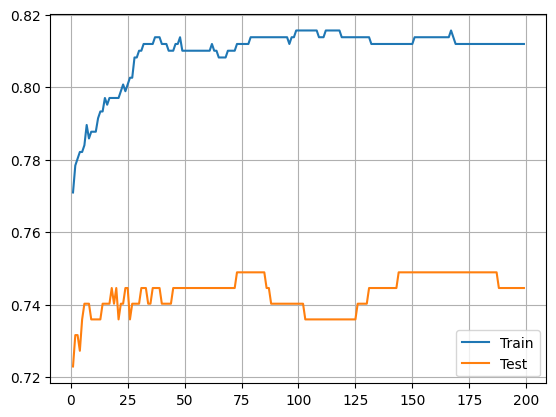

In [ ]:
plt.plot(C_values, scores_train, label='Train')
plt.plot(C_values, scores_test, label='Test')

plt.legend(loc='best')
plt.grid()
plt.show()

Как видно по графикам, обучения не происходит при ядре rbf, попробуем ядро poly. Рассматривать С будем до 50, потому что дальше нет смысла.

In [ ]:
models = []
scores_train = []
scores_test = []
C_values = list(range(1, 100))
for local_C in C_values:
    model = SVC(kernel="poly", C=local_C)
    model.fit(X_train, Y_train)
    models.append(model)
    scores_test.append(model.score(X_test, Y_test))
    scores_train.append(model.score(X_train, Y_train))

max_elem = max(scores_test)
print(max_elem, scores_test.index(max_elem))
max_train = scores_train[scores_test.index(max_elem)]
print('test:', max_elem * 100)
print('train:', max_train * 100)

0.7748917748917749 10
test: 77.48917748917748
train: 79.3296089385475


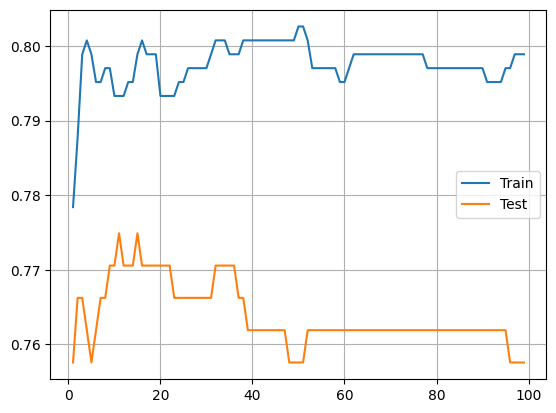

In [ ]:
plt.plot(C_values, scores_train, label='Train')
plt.plot(C_values, scores_test, label='Test')

plt.legend(loc='best')
plt.grid()
plt.show()

Графики получились примерно такие же, следовательно выборка на данном алгоритме не обучается и метод опорных векторов не эффективен на моем датасете.

Рассмотрим область, где результат на контрольной выборке максимальный.

0.7748917748917749 10
test: 77.48917748917748
train: 79.3296089385475


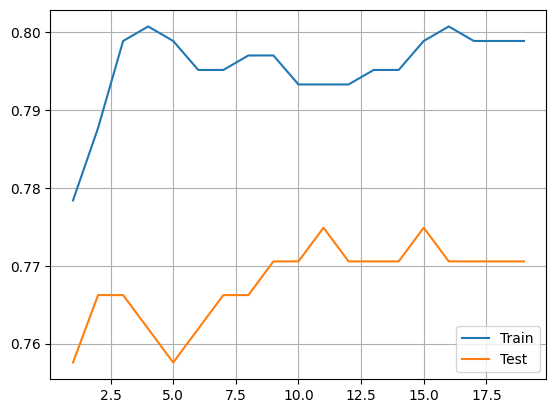

In [ ]:
# рассмотрим область максимума поближе (С = 1..20)

models = []
scores_train = []
scores_test = []
C_values = list(range(1, 20))
for local_C in C_values:
    model = SVC(kernel="poly", C=local_C)
    model.fit(X_train, Y_train)
    models.append(model)
    scores_test.append(model.score(X_test, Y_test))
    scores_train.append(model.score(X_train, Y_train))

max_elem = max(scores_test)
print(max_elem, scores_test.index(max_elem))
max_train = scores_train[scores_test.index(max_elem)]
print('test:', max_elem * 100)
print('train:', max_train * 100)

plt.plot(C_values, scores_train, label='Train')
plt.plot(C_values, scores_test, label='Test')

plt.legend(loc='best')
plt.grid()
plt.show()

Возьмем С = 11

<h2>Зависимость качества от ядра

<h3>Ядро: линейное (linear), ядро RBF (rbf), полиномиальное (poly), сигмоидальное (sigmoid).

In [ ]:
models = []
scores_train = []
scores_test = []
kernels = ('linear', 'poly', 'rbf', 'sigmoid')
for local_kernel in kernels:
    model = SVC(kernel=local_kernel, C=11)
    model.fit(X_train, Y_train)
    models.append(model)
    scores_test.append(model.score(X_test, Y_test))
    scores_train.append(model.score(X_train, Y_train))

print(scores_train)
print(scores_test)

[0.776536312849162, 0.7932960893854749, 0.7877094972067039, 0.441340782122905]
[0.7575757575757576, 0.7748917748917749, 0.7359307359307359, 0.47186147186147187]


In [ ]:
# по результатам ядро rbf показало себя лучше остальных 79% на обучении и 77% на контроле

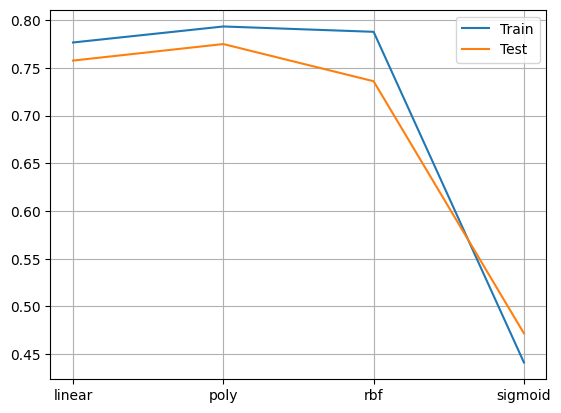

In [ ]:
plt.plot(kernels, scores_train, label='Train')
plt.plot(kernels, scores_test, label='Test')

plt.legend(loc='best')
plt.grid()
plt.show()

Лучшим ядром является poly

In [ ]:
# Применение алгоритма классификации с найденными значениями параметров
model = SVC(kernel="poly", C=11) # например такие гиперпараметры
model.fit(X_train, Y_train)

# Accuracy — доля правильных ответов алгоритма
print('Train: ', model.score(X_train, Y_train))
print('Test : ', model.score(X_test, Y_test))
print(classification_report(Y_test, model.predict(X_test)))

Train:  0.7932960893854749
Test :  0.7748917748917749
              precision    recall  f1-score   support

           0       0.78      0.92      0.84       153
           1       0.76      0.49      0.59        78

    accuracy                           0.77       231
   macro avg       0.77      0.70      0.72       231
weighted avg       0.77      0.77      0.76       231



Лучшим ядром является ядро poly при гиперпараметре регуляризации **С = 11**

> 79,3% на обучении

> 77% на контроле

<h3>Кросс-валидация параметров для SVM

In [ ]:
# выполним кросс-проверку
# возьмем различные разбиения выборки на обучающую и контрольную -
# рассмотрим результаты нашего алгоритма на каждом разбиении,
# а затем усредним результаты

model = SVC(kernel='poly', C=11)
test_accuracy = []

for i in range(0,100):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size = 0.3,    # Процент элементов в контрольной выборке
                                                    random_state = i)  # Фиксация разбиения на обучение и контроль
    model.fit(X_train, Y_train)
    test_accuracy.append(model.score(X_test, Y_test))

np.mean(test_accuracy)

0.7606060606060606

In [ ]:
# усредненное качество для 100 различных разбиений не сильно отклоняется от качества для одного из разбиений
# значит параметры подобраны хорошо

<h1> Метод стохастического градиента (SG)

In [ ]:
from sklearn.linear_model import SGDClassifier

# clf = SGDClassifier(loss='hinge', max_iter=100)
# clf.fit(X_train, Y_train)

# print('Train: ', clf.score(X_train, Y_train))
# print('Test : ', clf.score(X_test, Y_test))
# print(classification_report(Y_test, clf.predict(X_test)))

<h2> Зависимость качества от max_iter

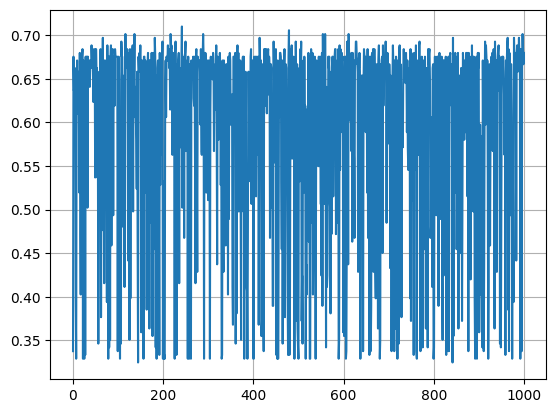

In [ ]:
test_accuracy = []
iter_range = range(1, 1000)

for max_iter in iter_range:
  model_ = SGDClassifier(max_iter=max_iter)
  model_.fit(X_train, Y_train)
  test_accuracy.append(model_.score(X_test, Y_test))

plt.plot(iter_range, test_accuracy)

plt.grid()
plt.show()

In [ ]:
print(test_accuracy.index(max(test_accuracy))) # параметр, на котором достигается максимальная точность

241


<h2> Зависимость качества от loss

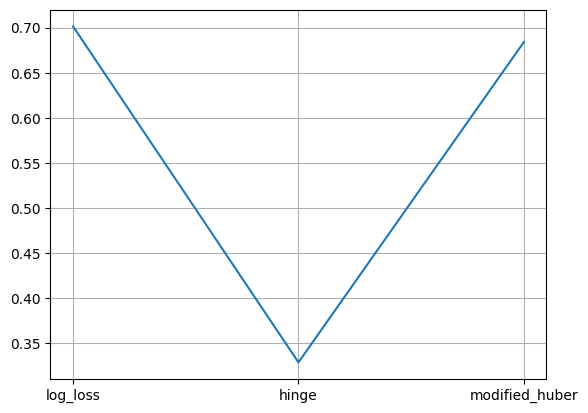

In [ ]:
test_accuracy = []
loss_funcs = ('log_loss', 'hinge', 'modified_huber')

for loss in loss_funcs:
  model_ = SGDClassifier(loss=loss, max_iter = 382)
  model_.fit(X_train, Y_train)
  test_accuracy.append(model_.score(X_test, Y_test))

plt.plot(loss_funcs, test_accuracy)

plt.grid()
plt.show()

In [ ]:
clf = SGDClassifier(loss='hinge', max_iter=382)
clf.fit(X_train, Y_train)

print('Train: ', clf.score(X_train, Y_train))
print('Test : ', clf.score(X_test, Y_test))
print(classification_report(Y_test, clf.predict(X_test)))

Train:  0.6405959031657356
Test :  0.6406926406926406
              precision    recall  f1-score   support

           0       0.73      0.74      0.73       155
           1       0.45      0.45      0.45        76

    accuracy                           0.64       231
   macro avg       0.59      0.59      0.59       231
weighted avg       0.64      0.64      0.64       231



<h2> Кросс-валидация параметров для SG

In [ ]:
# выполним кросс-проверку
# возьмем различные разбиения выборки на обучающую и контрольную -
# рассмотрим результаты нашего алгоритма на каждом разбиении,
# а затем усредним результаты

model = SGDClassifier(loss='hinge', max_iter=382)
test_accuracy = []

for i in range(0,100):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size = 0.3,    # Процент элементов в контрольной выборке
                                                    random_state = i)  # Фиксация разбиения на обучение и контроль
    model.fit(X_train, Y_train)
    test_accuracy.append(model.score(X_test, Y_test))

np.mean(test_accuracy)

0.5759740259740259

In [ ]:
# средняя точность по разбиениям отклоняется на 10% от точности, полученной на фиксированной выборке
# это можно объяснить случайностью выбора каждого следующего объекта при корректировке параметров алгоритма при его обучении

<h1> Заключение

<h2> 1. Метод опорных векторов (SVM) </h2>


*   Лучшее значение С = 11
*   Лучшее ядро - poly
*   Качество на обучениии - 79,3%
*   Качество на контроле - 77%

Проходя циклом по подбору гиперпараметра регуляризации С, я строила графики обучения. По этим графикам выяснилось, что данный метод не подходит для работы с моим датасетом, так как модель не обучалась.

Далее я рассматривала отдельно область максимума, чтобы увидеть, где результат на контрольной выборке максимальный. Получилось, что С = 11.

Следующим шагом я подбирала ядро, чтобы найти то, при котором получится лучший результат. Выбиралось ядро из следующих: linear, rbf, poly, sigmoid. Самым лучшим оказалось ядро poly.

Следовательно, в методе опорных векторов самым эффективным для моего датасета оказалось ядро poly при гиперпараметре C = 11.


<h2> 2. Метод стохастического градиента (SG) </h2>

*   Лучшая функция потерь - hinge
*   Максимальное кол-во итераций - 382
*   Качество на обучении - 65,7%
*   Качество на контроле - 68%

Проходя циклом с разными значениями max_iter, выяснилось, что наилучшим оказалось число 382.

Далее я рассматривала разные функции потерь и наиболее эффективным оказалась функция hinge.

В обоих методах были проведены проверки результатов кросс-валидацией параметров и было выявлено, что наилучшие параметры для методов были выбраны правильно.